In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruit-classify/dataset/test/1266.jpeg
/kaggle/input/fruit-classify/dataset/test/1862.jpeg
/kaggle/input/fruit-classify/dataset/test/311.jpeg
/kaggle/input/fruit-classify/dataset/test/3362.jpeg
/kaggle/input/fruit-classify/dataset/test/3652.jpeg
/kaggle/input/fruit-classify/dataset/test/1423.jpeg
/kaggle/input/fruit-classify/dataset/test/27.jpeg
/kaggle/input/fruit-classify/dataset/test/1415.jpeg
/kaggle/input/fruit-classify/dataset/test/314.jpeg
/kaggle/input/fruit-classify/dataset/test/1624.jpeg
/kaggle/input/fruit-classify/dataset/test/1973.jpeg
/kaggle/input/fruit-classify/dataset/test/1090.jpeg
/kaggle/input/fruit-classify/dataset/test/28.jpeg
/kaggle/input/fruit-classify/dataset/test/1593.jpeg
/kaggle/input/fruit-classify/dataset/test/2121.jpeg
/kaggle/input/fruit-classify/dataset/test/1751.jpeg
/kaggle/input/fruit-classify/dataset/test/70.jpeg
/kaggle/input/fruit-classify/dataset/test/1855.jpeg
/kaggle/input/fruit-classify/dataset/test/1575.jpeg
/kaggle/input/fruit-

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

train_dir = '/kaggle/input/fruit-classify/dataset/train'

validation_dir = '/kaggle/working/validation/'
os.makedirs(validation_dir, exist_ok=True)

#preprocessing
train_datagen = ImageDataGenerator( rescale=1./255,
    validation_split=0.1,
    #vertical_flip=True,
    rotation_range=20,  
    zoom_range=0.2,  
     
)

target_size = (224, 224)
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training'  
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    subset='validation'  
)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Found 8910 images belonging to 5 classes.
Found 990 images belonging to 5 classes.


import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from traitlets import validate
import sklearn.model_selection
import numpy as np
import tensorflow as tf
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras import regularizers
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from traitlets import validate
import sklearn.model_selection
import numpy as np
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras import regularizers
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical


In [3]:
"""import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(Flatten()) 
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))



# Compile the model
model.compile(optimizer='adam', lr=0.01,loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

model.fit(train_generator,
                    steps_per_epoch=277, 
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=30)
"""

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 46656)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [9]:
"""model.fit(train_generator,
                    steps_per_epoch=277, 
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=30)"""

Epoch 1/20
277/277 [==============================] - 164s 537ms/step - loss: 1.2440 - accuracy: 0.4730 - val_loss: 1.2411 - val_accuracy: 0.4812
Epoch 2/20
277/277 [==============================] - 118s 425ms/step - loss: 1.1041 - accuracy: 0.5343 - val_loss: 1.1391 - val_accuracy: 0.5219
Epoch 3/20
277/277 [==============================] - 116s 419ms/step - loss: 1.0477 - accuracy: 0.5678 - val_loss: 1.0823 - val_accuracy: 0.5479
Epoch 4/20
277/277 [==============================] - 117s 423ms/step - loss: 0.9900 - accuracy: 0.6047 - val_loss: 1.0589 - val_accuracy: 0.5833
Epoch 5/20
277/277 [==============================] - 116s 417ms/step - loss: 0.9483 - accuracy: 0.6217 - val_loss: 1.0602 - val_accuracy: 0.5875
Epoch 6/20
277/277 [==============================] - 117s 422ms/step - loss: 0.9051 - accuracy: 0.6449 - val_loss: 1.0292 - val_accuracy: 0.5854
Epoch 7/20
277/277 [==============================] - 119s 430ms/step - loss: 0.8784 - accuracy: 0.6596 - val_loss: 1.0105 -

# save predictions

In [62]:
model = load_model('/kaggle/working/model5.h5')

test_folder = '/kaggle/input/fruit-classify/dataset/test'

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))  
    img = img / 255.0  
    return img


predictions = []

for filename in os.listdir(test_folder):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')): 
        image_path = os.path.join(test_folder, filename)
        preprocessed_image = preprocess_image(image_path)
        preprocessed_image = np.expand_dims(preprocessed_image, axis=0)  

        prediction = model.predict(preprocessed_image)
        predicted_class = np.argmax(prediction)

        predictions.append({
            'image_id': int(os.path.splitext(filename)[0]),
            'label': predicted_class + 1  
        })
        
       
        
df = pd.DataFrame(predictions)
df.to_csv('/kaggle/working/predictions_dod.csv', index=False)


1/1 [==============================] - 0s 20ms/step


"df = pd.DataFrame(predictions)\ndf.to_csv('/kaggle/working/predictions.csv', index=False)\n"

# mobilnet

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Activation, GlobalAveragePooling2D, Dense


model = Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), strides=(2, 2), padding='same', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Block 2
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Block 3
model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Block 4
model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Block 5
model.add(Conv2D(256, (3, 3), strides=(2, 2), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Block 6
model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Block 7
model.add(Conv2D(512, (3, 3), strides=(2, 2), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Five blocks without loops
for _ in range(5):
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

# Block 13
model.add(Conv2D(1024, (3, 3), strides=(2, 2), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Block 14
model.add(Conv2D(1024, (3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(GlobalAveragePooling2D())
model.add(Dense(5, activation='softmax'))

optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])



my_callback = MyCallback()
earlyStopping = EarlyStopping(patience=50, min_delta=0.001, monitor="val_loss", restore_best_weights=True)
cp = ModelCheckpoint('bestt_mobil_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)


model.summary()

history = model.fit(train_generator,
          steps_per_epoch=277,
          epochs=100,
          validation_data=validation_generator,
          validation_steps=30,
          callbacks=[my_callback, earlyStopping, cp])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_154 (Conv2D)         (None, 112, 112, 32)      896       
                                                                 
 batch_normalization_154 (B  (None, 112, 112, 32)      128       
 atchNormalization)                                              
                                                                 
 activation_154 (Activation  (None, 112, 112, 32)      0         
 )                                                               
                                                                 
 conv2d_155 (Conv2D)         (None, 112, 112, 64)      18496     
                                                                 
 batch_normalization_155 (B  (None, 112, 112, 64)      256       
 atchNormalization)                                              
                                                      

In [25]:
#model.save('modelll.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
from keras.models import load_model
model = load_model('/kaggle/working/bestt_mobil_model.h5')

test_folder = '/kaggle/input/fruit-classify/dataset/test'

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))  
    img = img / 255.0  
    return img


predictions = []

for filename in os.listdir(test_folder):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')): 
        image_path = os.path.join(test_folder, filename)
        preprocessed_image = preprocess_image(image_path)
        preprocessed_image = np.expand_dims(preprocessed_image, axis=0)  

        prediction = model.predict(preprocessed_image)
        predicted_class = np.argmax(prediction)

        predictions.append({
            'image_id': int(os.path.splitext(filename)[0]),
            'label': predicted_class + 1  
        })
        
       


1/1 [==============================] - 0s 21ms/step


In [21]:
#predictions

[{'image_id': 1266, 'label': 3},
 {'image_id': 1862, 'label': 4},
 {'image_id': 311, 'label': 1},
 {'image_id': 3362, 'label': 4},
 {'image_id': 3652, 'label': 2},
 {'image_id': 1423, 'label': 3},
 {'image_id': 27, 'label': 1},
 {'image_id': 1415, 'label': 3},
 {'image_id': 314, 'label': 2},
 {'image_id': 1624, 'label': 2},
 {'image_id': 1973, 'label': 3},
 {'image_id': 1090, 'label': 4},
 {'image_id': 28, 'label': 3},
 {'image_id': 1593, 'label': 5},
 {'image_id': 2121, 'label': 4},
 {'image_id': 1751, 'label': 3},
 {'image_id': 70, 'label': 3},
 {'image_id': 1855, 'label': 2},
 {'image_id': 1575, 'label': 3},
 {'image_id': 545, 'label': 1},
 {'image_id': 1477, 'label': 4},
 {'image_id': 1546, 'label': 5},
 {'image_id': 2000, 'label': 3},
 {'image_id': 1463, 'label': 1},
 {'image_id': 2845, 'label': 1},
 {'image_id': 1153, 'label': 2},
 {'image_id': 1526, 'label': 1},
 {'image_id': 1521, 'label': 5},
 {'image_id': 2044, 'label': 1},
 {'image_id': 1718, 'label': 3},
 {'image_id': 1411,

In [22]:
        
df = pd.DataFrame(predictions)
df.to_csv('/kaggle/working/predictions_mobil1.csv', index=False)

NameError: name 'history' is not defined

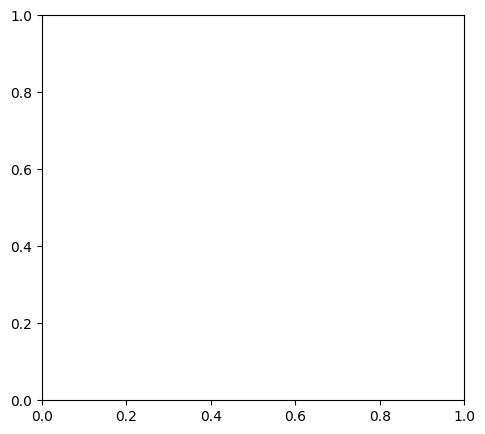

In [24]:
"""# Plot training history
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()"""